<a href="https://colab.research.google.com/github/Aldistwn29/ProjectDS/blob/main/Project_Saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import Library
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
%matplotlib inLine

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
jkse = pd.read_csv('^JKSE.csv')
jkse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       243 non-null    object 
 1   Open       243 non-null    float64
 2   High       243 non-null    float64
 3   Low        243 non-null    float64
 4   Close      243 non-null    float64
 5   Adj Close  243 non-null    float64
 6   Volume     243 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.4+ KB


In [4]:
jkse.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-22,7063.247070,7108.831055,7030.587891,7030.587891,7030.587891,177602200
1,2022-11-23,7030.626953,7089.693848,7026.391113,7054.123047,7054.123047,157476700
2,2022-11-24,7054.162109,7104.889160,7054.162109,7080.515137,7080.515137,159926700
3,2022-11-25,7080.554199,7086.562012,7013.221191,7053.149902,7053.149902,158716200
4,2022-11-28,7053.109863,7083.378906,7011.453125,7017.357910,7017.357910,187211500


# Exploratory Data

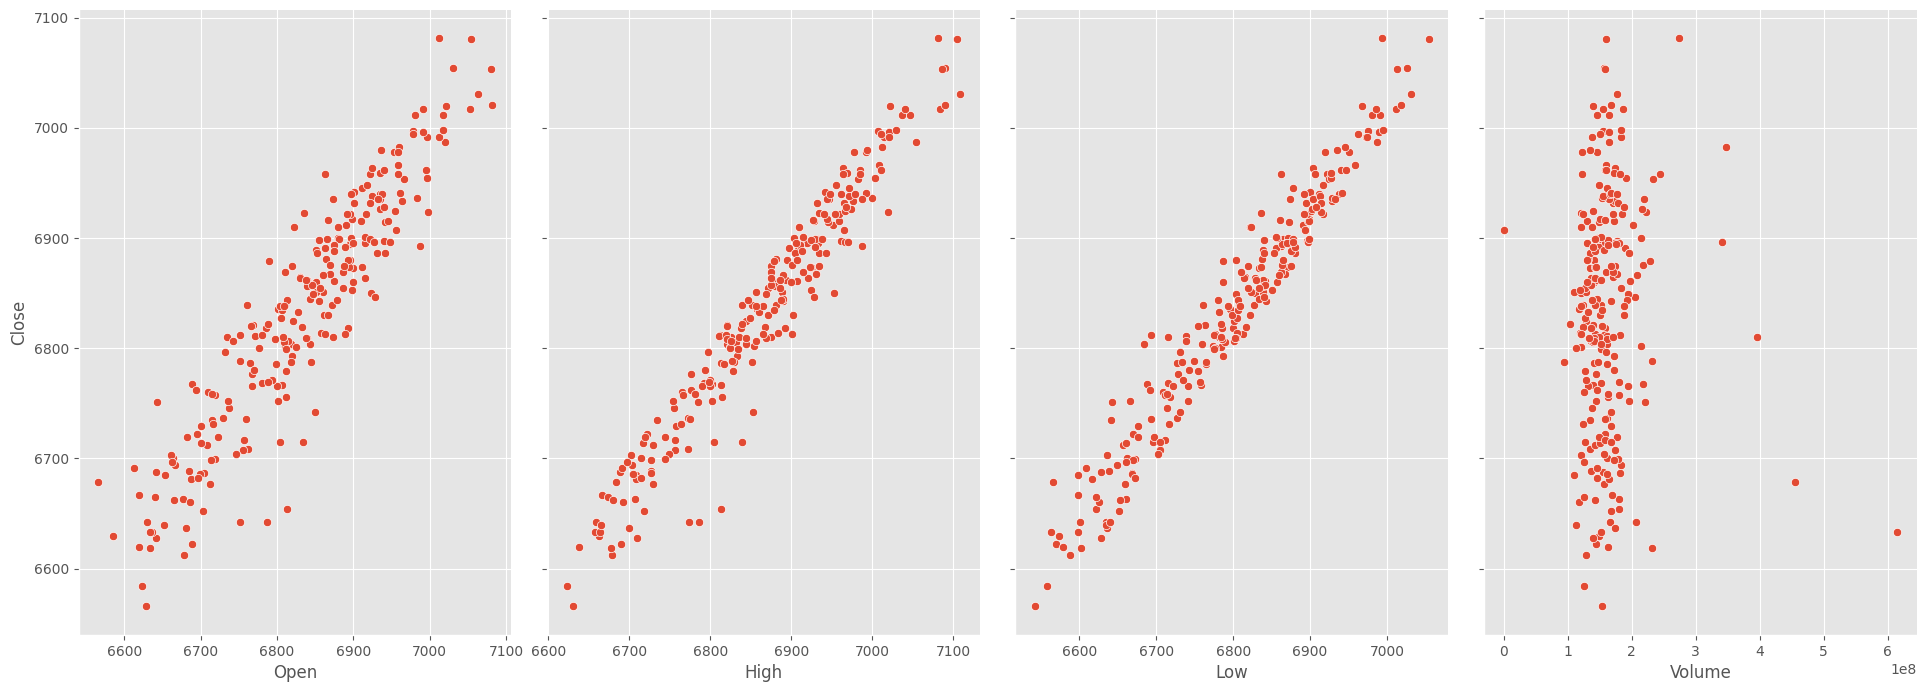

In [35]:
# melihat hubungan antara Features dan Response
sns.pairplot(jkse, x_vars=['Open' ,'High', 'Low', 'Volume'],
             y_vars=['Close'], height=7, aspect=0.7)

<ipython-input-36-6e831c7c7906>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(jkse.corr(), annot=True)


<Axes: >

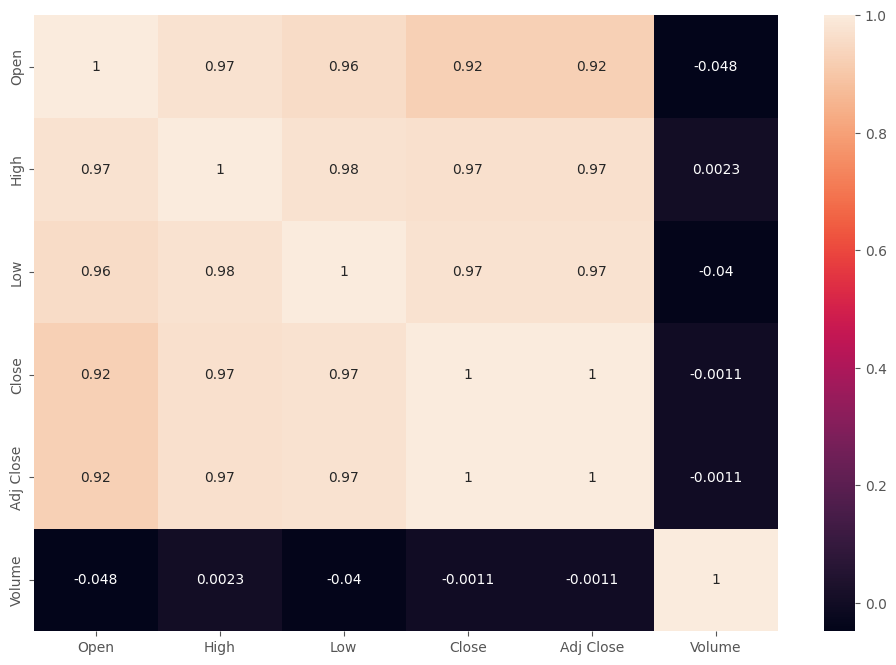

In [36]:
sns.heatmap(jkse.corr(), annot=True)

Korelasi High dan Low antara Close itu sangat Tinggi di kisaran 0.97

# Feature Selection Using Adjusted R2 Score

In [5]:
# import modul r2 score dan linear regresion
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [39]:
X = jkse[['Open' ,'High', 'Low', 'Volume']]
Y = jkse[['Close']]

In [40]:
lm1 = LinearRegression().fit(X[['Open' ,'High', 'Low', 'Volume']],Y)
lm1_preds = lm1.predict(X[['Open' ,'High', 'Low', 'Volume']])

r_squared = r2_score(Y, lm1_preds)
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted: ", adjusted_r_squared)

Adjusted:  0.9671226656411619


In [44]:
X = jkse[['Open','High', 'Low']]
Y = jkse[['Close']]
lm4 = LinearRegression().fit(X[['Open','High', 'Low']],Y)
lm4_preds = lm4.predict(X[['Open', 'High', 'Low']])

r_squared4 = r2_score(Y, lm4_preds)
adjusted_r_squared4 = 1 - (1-r_squared4)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted: ", adjusted_r_squared4)

Adjusted:  0.9672511826966802


In [45]:
X = jkse[['High', 'Low', 'Volume']]
Y = jkse[['Close']]
lm3 = LinearRegression().fit(X[['High', 'Low', 'Volume']],Y)
lm3_preds = lm3.predict(X[[ 'High', 'Low', 'Volume']])

r_squared3 = r2_score(Y, lm3_preds)
adjusted_r_squared3 = 1 - (1-r_squared3)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted: ", adjusted_r_squared3)

Adjusted:  0.9577342351345862


In [46]:
X = jkse[['High', 'Low']]
Y = jkse[['Close']]
lm2 = LinearRegression().fit(X[['High', 'Low']],Y)
lm2_preds = lm2.predict(X[[ 'High', 'Low']])

r_squared2 = r2_score(Y, lm2_preds)
adjusted_r_squared2 = 1 - (1-r_squared2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted: ", adjusted_r_squared2)

Adjusted:  0.9573934257492241


In [47]:
X = jkse[['Open', 'Volume']]
Y = jkse[['Close']]
lm5 = LinearRegression().fit(X[['Open', 'Volume']],Y)
lm5_preds = lm5.predict(X[['Open', 'Volume']])

r_squared5 = r2_score(Y, lm5_preds)
adjusted_r_squared5 = 1 - (1-r_squared5)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted: ", adjusted_r_squared5)

Adjusted:  0.8562498641402463


Jadi dari ke 5 percobaan modul, didapatkan kombinasi yg berkorelasi dengan skor adjusted R-Squared yaitu 'Open' , 'High, dan 'Low'

# Evaluation the model

dengan menggunakan RMSE(Root Mean Squered)

In [54]:
#Model Evaluation Using Train/Test dan metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [55]:
# 'Open' ,'High', 'Low', 'Volume'
X = jkse[['Open' ,'High', 'Low', 'Volume']]
Y = jkse[['Close']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
lm6 = LinearRegression().fit(X_train, Y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm6_preds)))
print("adjusted R^2: ", 1-(1-r2_score(Y_test, lm6_preds)*(len(Y)-1)/(len(Y)-X.shape[1]-1)))

RMSE:  18.111460033430504
adjusted R^2:  0.9823374720042732


In [56]:
# 'High', 'Low', 'Volume'
X = jkse[['High', 'Low', 'Volume']]
Y = jkse[['Close']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
lm7 = LinearRegression().fit(X_train, Y_train)
lm7_preds = lm7.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm7_preds)))
print("adjusted R^2: ", 1-(1-r2_score(Y_test, lm7_preds)*(len(Y)-1)/(len(Y)-X.shape[1]-1)))

RMSE:  19.777515002281692
adjusted R^2:  0.9716217663618153


In [57]:
X = jkse[['Open','High', 'Low']]
Y = jkse[['Close']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
lm10 = LinearRegression().fit(X_train, Y_train)
lm10_preds = lm10.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm10_preds)))
print("adjusted R^2: ", 1-(1-r2_score(Y_test, lm10_preds)*(len(Y)-1)/(len(Y)-X.shape[1]-1)))

RMSE:  18.023325244558627
adjusted R^2:  0.9785605284899949


In [58]:
X = jkse[['Open', 'Volume']]
Y = jkse[['Close']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
lm8 = LinearRegression().fit(X_train, Y_train)
lm8_preds = lm8.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm8_preds)))
print("adjusted R^2: ", 1-(1-r2_score(Y_test, lm8_preds)*(len(Y)-1)/(len(Y)-X.shape[1]-1)))

RMSE:  31.27486690608515
adjusted R^2:  0.9064081328109818


In [59]:
X = jkse[['High', 'Low']]
Y = jkse[['Close']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
lm9 = LinearRegression().fit(X_train, Y_train)
lm9_preds = lm9.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm9_preds)))
print("adjusted R^2: ", 1-(1-r2_score(Y_test, lm9_preds)*(len(Y)-1)/(len(Y)-X.shape[1]-1)))

RMSE:  19.37812660940207
adjusted R^2:  0.9692029400919164


# Conclusion

Jadi melalui variabel independen Open, High, Low untuk memprediksi harga Close itu lebih mudah, dibandingkan dengan Volume